In [13]:
#import necessary modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [56]:
#load data
raw_data = pd.read_csv('austin_crime.csv')
raw_data.name = 'Raw Data'
#view data
raw_data

,address,census_tract,clearance_date,clearance_status,council_district_code,description,district,latitude,location,location_description,longitude,primary_type,timestamp,unique_key,x_coordinate,y_coordinate,year,zipcode
0,2620 RIO GRANDE ST Austin TX 78705,6.03,2015-12-14 00:00:00,Not cleared,9.0,THEFT,B,NaN,NaN,2620 RIO GRANDE ST,NaN,Theft,2015-12-13 00:00:00,2.015505e+10,3113531.0,10079579.0,2015.0,78705.0
1,9500 S IH 35 SVRD SB Austin TX 78748,24.21,2015-09-14 00:00:00,Cleared by Arrest,5.0,THEFT BY SHOPLIFTING,F,NaN,NaN,9500 S IH 35 SVRD SB,NaN,Theft,2015-09-03 00:00:00,2.015246e+10,3099459.0,10032098.0,2015.0,78748.0
2,1000 E 41ST ST,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Austin TX 78751,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,(30.298356 -97.719647),3.02,2014-07-29 00:00:00,Cleared by Arrest,9.0,THEFT BY SHOPLIFTING,B,30.298356,(30.298356-97.719647),1000 E 41ST ST,-97.719647,Theft: Shoplifting,2014-04-04 00:00:00,2.014941e+09,3121345.0,10082705.0,2014.0,78751.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159459,(30.207396 -97.728709),24.31,2014-06-04 00:00:00,Not cleared,2.0,THEFT OF METAL,F,30.207396,(30.207396-97.728709),4000 CAVEN RD,-97.728709,Theft: All Other Larceny,2014-06-03 00:00:00,2.014502e+10,3119195.0,10048844.0,2014.0,78744.0
159460,10713 JOLLYVILLE RD Austin TX 78759,17.22,2016-01-12 00:00:00,Not cleared,10.0,THEFT BY SHOPLIFTING,A,NaN,NaN,10713 JOLLYVILLE RD,NaN,Theft,2015-12-30 00:00:00,2.015506e+10,3111397.0,10118845.0,2015.0,78759.0
159461,1712 TIMBER RIDGE DR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
159462,Austin TX 78741,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
#check out data if all rows with NaN's are dropped
drop_nans = raw_data.copy().dropna()

drop_nans

,address,census_tract,clearance_date,clearance_status,council_district_code,description,district,latitude,location,location_description,longitude,primary_type,timestamp,unique_key,x_coordinate,y_coordinate,year,zipcode
4,(30.298356 -97.719647),3.02,2014-07-29 00:00:00,Cleared by Arrest,9.0,THEFT BY SHOPLIFTING,B,30.298356,(30.298356-97.719647),1000 E 41ST ST,-97.719647,Theft: Shoplifting,2014-04-04 00:00:00,2.014941e+09,3121345.0,10082705.0,2014.0,78751.0
9,(30.272154 -97.730002),8.029999999999999,2014-05-08 00:00:00,Not cleared,1.0,AUTO THEFT,C,30.272154,(30.272154-97.730002),1000 E 12TH ST,-97.730002,Auto Theft,2014-04-04 00:00:00,2.014941e+09,3118304.0,10072414.0,2014.0,78702.0
14,(30.201243 -97.709249),24.31,2014-05-09 00:00:00,Not cleared,2.0,THEFT,H,30.201243,(30.201243-97.709249),6800 BURLESON RD,-97.709249,Theft: All Other Larceny,2014-05-08 00:00:00,2.014502e+10,3125886.0,10047276.0,2014.0,78744.0
17,(30.271198 -97.705609),8.02,2014-12-19 00:00:00,Not cleared,1.0,AUTO THEFT,C,30.271198,(30.271198-97.705609),3506 WEBBERVILLE RD,-97.705609,Auto Theft,2014-12-18 00:00:00,2.014352e+10,3125976.0,10072207.0,2014.0,78702.0
20,(30.356418 -97.731423),18.170000000000002,2014-04-17 00:00:00,Not cleared,7.0,THEFT,B,30.356418,(30.356418-97.731423),2438 W ANDERSON LN,-97.731423,Theft: All Other Larceny,2014-04-16 00:00:00,2.014502e+10,3117183.0,10103211.0,2014.0,78757.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159450,(30.312239 -97.662693),22.01,2014-12-05 00:00:00,Not cleared,1.0,THEFT,C,30.312239,(30.312239-97.662693),7112 ED BLUESTEIN BLVD NB,-97.662693,Theft: All Other Larceny,2014-11-25 00:00:00,2.014505e+10,3139137.0,10088360.0,2014.0,78724.0
159453,(30.393536 -97.645133),18.39,2014-03-27 00:00:00,Not cleared,7.0,THEFT,E,30.393536,(30.393536-97.645133),12600 DESSAU RD,-97.645133,Theft: All Other Larceny,2014-03-26 00:00:00,2.014851e+09,3144046.0,10117185.0,2014.0,78753.0
159456,(30.405797 -97.74491),17.54,2015-01-04 00:00:00,Not cleared,7.0,AGG ASLT ENHANC STRANGL/SUFFOC,A,30.405797,(30.405797-97.74491),11111 RESEARCH BLVD SVRD NB,-97.744910,Aggravated Assault,2014-12-28 00:00:00,2.014362e+10,3112507.0,10120833.0,2014.0,78759.0
159459,(30.207396 -97.728709),24.31,2014-06-04 00:00:00,Not cleared,2.0,THEFT OF METAL,F,30.207396,(30.207396-97.728709),4000 CAVEN RD,-97.728709,Theft: All Other Larceny,2014-06-03 00:00:00,2.014502e+10,3119195.0,10048844.0,2014.0,78744.0


In [29]:
#BE SURE TO MENTION HOW THE DATA IS SUBSETTED IN PRESENTATION/README
#the above data is sufficient, rename dataframe, delete temp, show renamed df
no_nulls_df = drop_nans
no_nulls_df.name = 'Dropped Nulls DataFrame'
#del drop_nans
no_nulls_df

,address,census_tract,clearance_date,clearance_status,council_district_code,description,district,latitude,location,location_description,longitude,primary_type,timestamp,unique_key,x_coordinate,y_coordinate,year,zipcode
4,(30.298356 -97.719647),3.02,2014-07-29 00:00:00,Cleared by Arrest,9.0,THEFT BY SHOPLIFTING,B,30.298356,(30.298356-97.719647),1000 E 41ST ST,-97.719647,Theft: Shoplifting,2014-04-04 00:00:00,2.014941e+09,3121345.0,10082705.0,2014.0,78751.0
9,(30.272154 -97.730002),8.029999999999999,2014-05-08 00:00:00,Not cleared,1.0,AUTO THEFT,C,30.272154,(30.272154-97.730002),1000 E 12TH ST,-97.730002,Auto Theft,2014-04-04 00:00:00,2.014941e+09,3118304.0,10072414.0,2014.0,78702.0
14,(30.201243 -97.709249),24.31,2014-05-09 00:00:00,Not cleared,2.0,THEFT,H,30.201243,(30.201243-97.709249),6800 BURLESON RD,-97.709249,Theft: All Other Larceny,2014-05-08 00:00:00,2.014502e+10,3125886.0,10047276.0,2014.0,78744.0
17,(30.271198 -97.705609),8.02,2014-12-19 00:00:00,Not cleared,1.0,AUTO THEFT,C,30.271198,(30.271198-97.705609),3506 WEBBERVILLE RD,-97.705609,Auto Theft,2014-12-18 00:00:00,2.014352e+10,3125976.0,10072207.0,2014.0,78702.0
20,(30.356418 -97.731423),18.170000000000002,2014-04-17 00:00:00,Not cleared,7.0,THEFT,B,30.356418,(30.356418-97.731423),2438 W ANDERSON LN,-97.731423,Theft: All Other Larceny,2014-04-16 00:00:00,2.014502e+10,3117183.0,10103211.0,2014.0,78757.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159450,(30.312239 -97.662693),22.01,2014-12-05 00:00:00,Not cleared,1.0,THEFT,C,30.312239,(30.312239-97.662693),7112 ED BLUESTEIN BLVD NB,-97.662693,Theft: All Other Larceny,2014-11-25 00:00:00,2.014505e+10,3139137.0,10088360.0,2014.0,78724.0
159453,(30.393536 -97.645133),18.39,2014-03-27 00:00:00,Not cleared,7.0,THEFT,E,30.393536,(30.393536-97.645133),12600 DESSAU RD,-97.645133,Theft: All Other Larceny,2014-03-26 00:00:00,2.014851e+09,3144046.0,10117185.0,2014.0,78753.0
159456,(30.405797 -97.74491),17.54,2015-01-04 00:00:00,Not cleared,7.0,AGG ASLT ENHANC STRANGL/SUFFOC,A,30.405797,(30.405797-97.74491),11111 RESEARCH BLVD SVRD NB,-97.744910,Aggravated Assault,2014-12-28 00:00:00,2.014362e+10,3112507.0,10120833.0,2014.0,78759.0
159459,(30.207396 -97.728709),24.31,2014-06-04 00:00:00,Not cleared,2.0,THEFT OF METAL,F,30.207396,(30.207396-97.728709),4000 CAVEN RD,-97.728709,Theft: All Other Larceny,2014-06-03 00:00:00,2.014502e+10,3119195.0,10048844.0,2014.0,78744.0


In [90]:
#create categorical value_counts dictionary
def value_counts_dict_on_frame(df, columns):
    res = {}           # dictionary with column name as key, value_counts Series as key
    for c in columns:
        res[c] = df[c].value_counts(dropna = False)
    return res

In [91]:
#store a dictionary for categorical values [no_nulls_df] in variable
categorical_columns = ['clearance_status', 'council_district_code', 
                    'district', 'primary_type', 'year', 'zipcode']
categorical_vc_dict_nulless_df = value_counts_dict_on_frame(no_nulls_df, categorical_columns)

In [92]:
#plot distributions of certain columns function
def plot_distributions(df, columns):
    fig, axs = plt.subplots(len(columns), figsize = (10, 20))
    for i,column in zip(axs.flatten(), columns):
        array = df[column]
        array.hist(ax = i)
        i.set_title(f'{column} distribution in {df.name}')
        i.set_xlabel(f'{column} value')
        i.set_ylabel(f'# of occurences in {df.name}')
    fig.tight_layout()

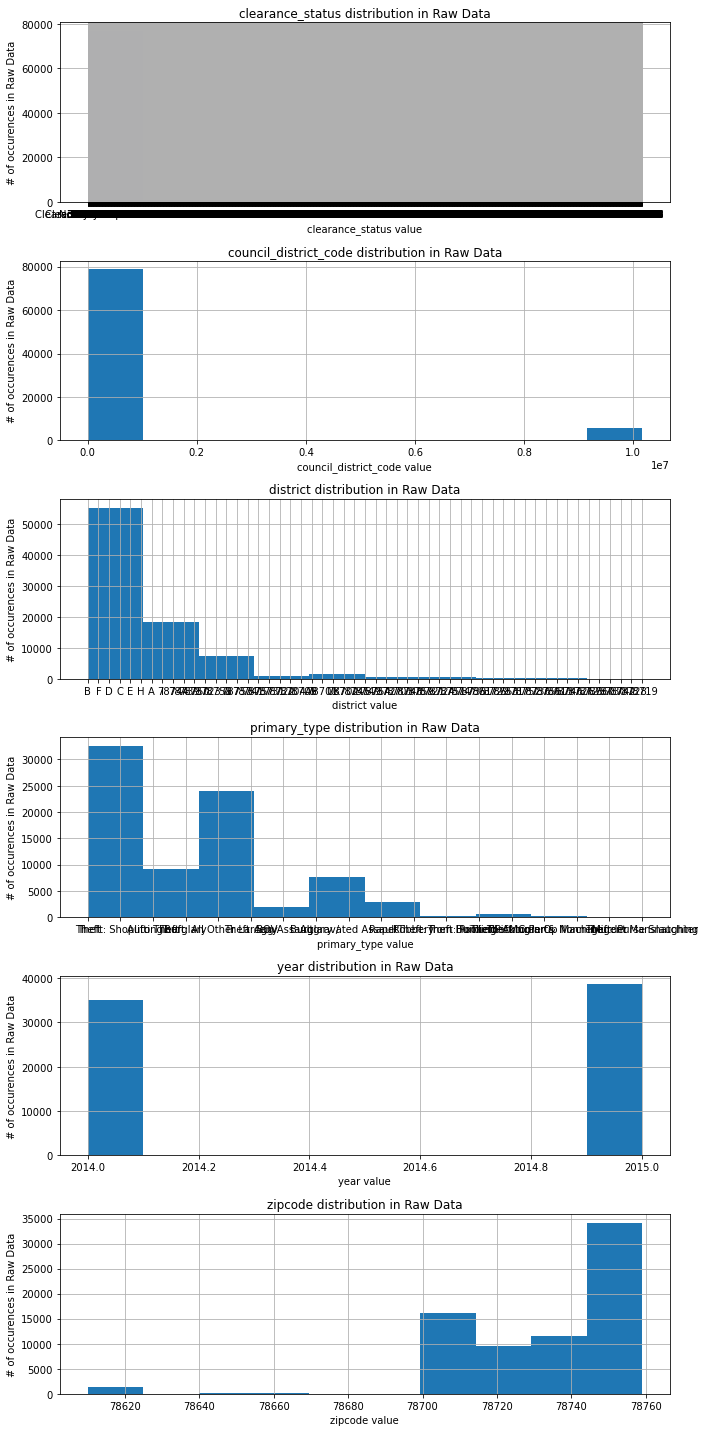

In [93]:
#plot distributions on raw data
plot_distributions(raw_data, categorical_columns)

In [94]:
#examine dictionary of the above distributions in raw_data
#noted that there are many labels with sparse entires, considering 'Other' category on several fields
raw_vc_dictionary_categorical = value_counts_dict_on_frame (raw_data, categorical_columns)
for entry in raw_vc_dictionary_categorical.values():
    print(entry)
    print()
    print()

NaN                     77984
Not cleared             62471
Cleared by Arrest       11275
Cleared by Exception     2073
3122189                    35
                        ...  
3128140                     1
3130412                     1
3136232                     1
3134008                     1
3100666                     1
Name: clearance_status, Length: 4073, dtype: int64


NaN           75008
3.0           12176
9.0           11767
4.0           11412
7.0            9190
              ...  
10046614.0        1
10108606.0        1
10030238.0        1
10063121.0        1
10115882.0        1
Name: council_district_code, Length: 4170, dtype: int64


NaN      74593
D        11346
E        10599
F         9811
B         9247
I         8971
A         8769
H         8030
C         6317
G         5584
78741      598
78753      440
78745      435
78758      412
78744      407
78702      374
78723      330
78704      318
AP         298
UK         242
78748      203
78757      189
78752    

In [95]:
##### START HERE!!!!!!!!!!!!!!!! ######
#exmine series 1/6 in ['clearance_status', 'council_district_code', 'district', 'primary_type', 'year', 'zipcode']
raw_vc_dictionary_categorical['clearance_status']

NaN                     77984
Not cleared             62471
Cleared by Arrest       11275
Cleared by Exception     2073
3122189                    35
                        ...  
3128140                     1
3130412                     1
3136232                     1
3134008                     1
3100666                     1
Name: clearance_status, Length: 4073, dtype: int64

In [ ]:
#Begin creating 'categorized df' here when cycling back to EDA ********************************
#above we saw that most of the series are top heavy, create 'other' categories for the sparse categories to reduce
#the number of categories and see a better plot of the data
categorized_df = raw_data.copy()

In [1]:
#create df with full long/lat
long_lat_df = pd.DataFrame(columns = categorized_df['latitude', 'longitude']).dropna()
long_lat_df

NameError: name 'pd' is not defined